In [28]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv(r'D:\Data Science Entry Elevate\Capstone Project\Jupyter Notebook\News.csv') 
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [47]:
data.tail()

,text,class
44893,americans need put american citizens first dum...,0
44894,washington reuters the us treasury enforce san...,1
44895,charlottesville va reuters two people say inju...,1
44896,houston reuters republican ted cruzs hopes swe...,1
44897,havana reuters cuba political prisoners us gov...,1


In [34]:
data.shape

(44898, 5)

In [35]:
data = data.drop(["title", "subject","date"], axis = 1)

In [36]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [37]:
# Shuffling 
data = data.sample(frac=1) 
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 

<Axes: xlabel='class', ylabel='count'>

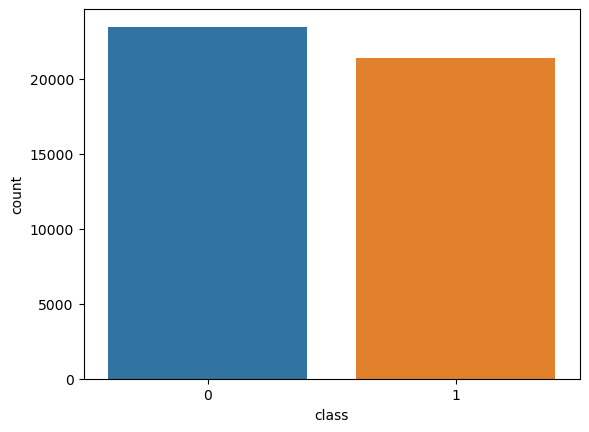

In [38]:
sns.countplot(data=data, 
			x='class', 
			order=data['class'].value_counts().index)

In [42]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 563.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 722.1 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.1 MB/s eta 0:00:00


In [43]:
from tqdm import tqdm #progress bar
import re #regular expression
import nltk #natural language toolkit (human language data)
nltk.download('punkt') #tokenizing text into word
nltk.download('stopwords') #common word filter
from nltk.corpus import stopwords #text preprocessing
from nltk.tokenize import word_tokenize #function for split text into words
from nltk.stem.porter import PorterStemmer #stemming(words to their rootform)
from wordcloud import WordCloud #create visual of words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def preprocess_text(text_data): 
	preprocessed_text = [] #cretaes an empty list
	
	for sentence in tqdm(text_data): #progress bar loop
		sentence = re.sub(r'[^\w\s]', '', sentence) #remove punctuation
		preprocessed_text.append(' '.join(token.lower() 
								for token in str(sentence).split() #split  to tokens, lower case, remove common words
								if token not in stopwords.words('english'))) 

	return preprocessed_text # joined the tokens and fill the empty list

In [45]:
preprocessed_review = preprocess_text(data['text'].values) 
data['text'] = preprocessed_review #cleans and process into this, replaces the original text column

100%|██████████████████████████████████████████████████████████████████████████| 44898/44898 [1:13:32<00:00, 10.17it/s]


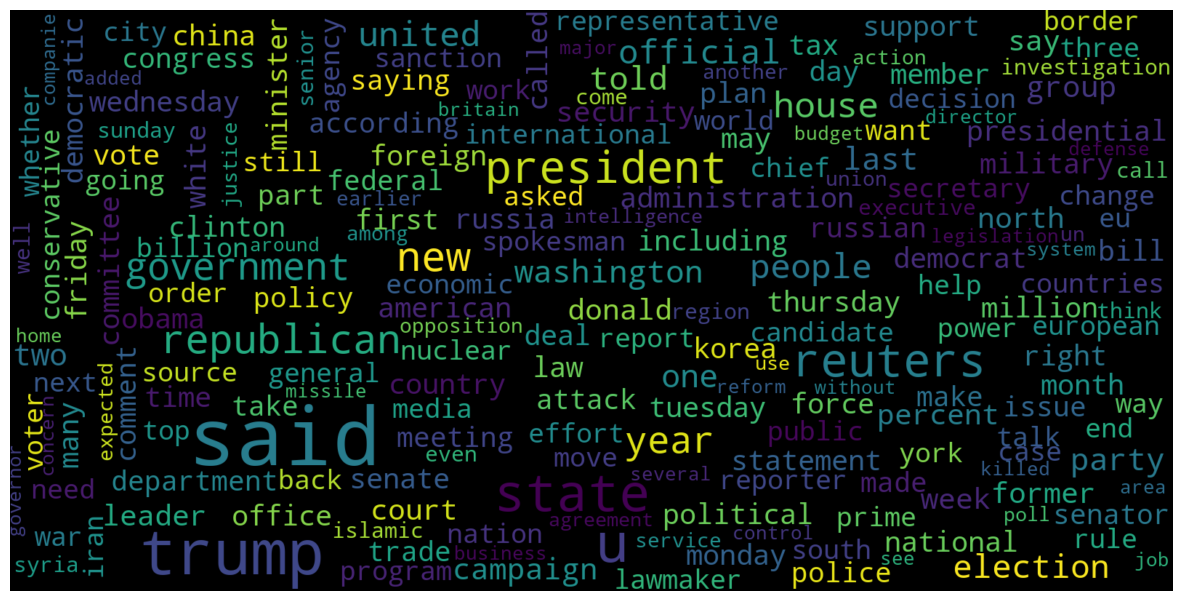

In [48]:
# Real 
# join the text, set size
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

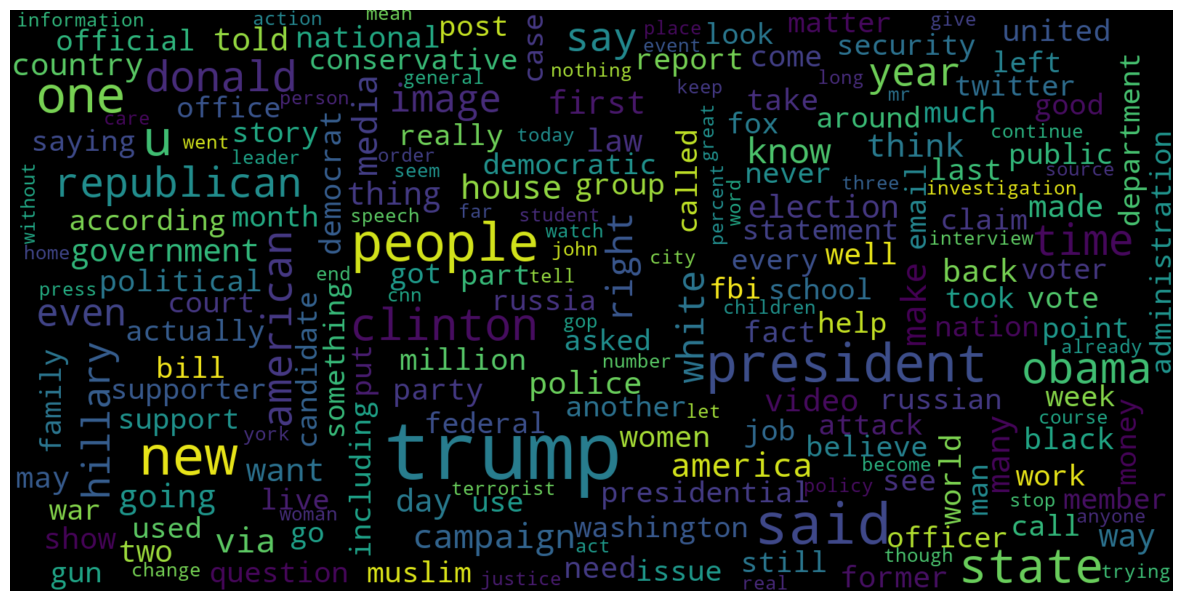

In [49]:
# Fake 
# join the text, set size
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

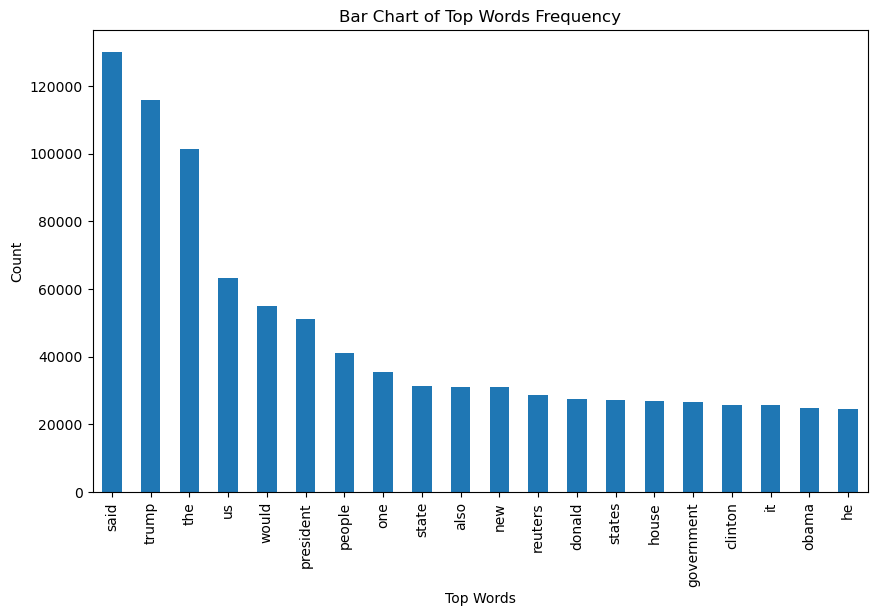

In [50]:
from sklearn.feature_extraction.text import CountVectorizer #bag of words


def get_top_n_words(corpus, n=None): 
	vec = CountVectorizer().fit(corpus) 
	bag_of_words = vec.transform(corpus) 
	sum_words = bag_of_words.sum(axis=0) # sums the count of each words 
	words_freq = [(word, sum_words[0, idx]) 
				for word, idx in vec.vocabulary_.items()] 
	words_freq = sorted(words_freq, key=lambda x: x[1], 
						reverse=True) 
	return words_freq[:n] #top n counts of words


common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
	kind='bar', 
	figsize=(10, 6), 
	xlabel="Top Words", 
	ylabel="Count", 
	title="Bar Chart of Top Words Frequency"
) 

In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(data['text'], 
													data['class'], 
													test_size=0.25)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression() 
model.fit(x_train, y_train) 

# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.9935853651293322
0.9901113585746102


In [54]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 

# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.9999703026163395
0.9967037861915368


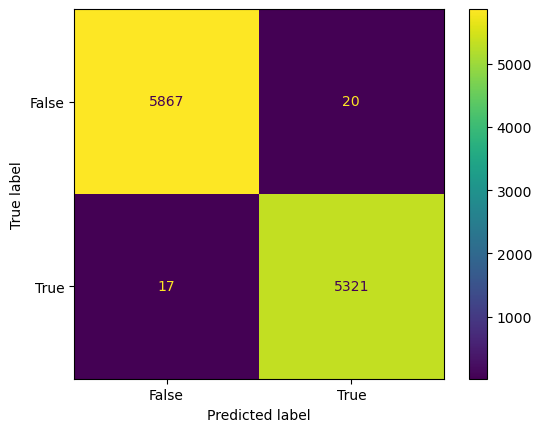

In [55]:
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
											display_labels=[False, True]) 

cm_display.plot() 
plt.show() 

In [56]:
import joblib

In [57]:
joblib.dump(model, 'fake_news_model.joblib')

['fake_news_model.joblib']